In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from RegresionL import RegresionLineal

In [2]:
df = pd.read_csv("Data/casas_dev.csv")
df.head(60)

,precio,tipo,Área,metros_cubiertos,unidades,ambientes,pisos,pileta,lat,lon,edad
0,159001.587058,depto,721.976728,703.066245,sqft,5,NaN,False,40.738155,-73.992277,NaN
1,42435.625078,casa,229.512155,113.935741,m2,4,1.0,True,-34.710794,-58.280446,67.202318
2,NaN,depto,73.856399,72.887849,m2,4,NaN,False,-34.704461,-58.256815,2.085965
3,135972.861876,depto,776.709623,747.693158,sqft,5,NaN,False,40.847320,-74.011712,13.835526
4,49758.465224,casa,249.165942,102.023922,m2,5,2.0,False,-34.777778,-58.255182,63.200110
5,7256.796507,casa,170.849136,77.355172,m2,6,2.0,True,-34.693175,-58.240397,4.305892
6,84.244291,ph,115.819630,89.400354,m2,7,1.0,False,-34.787597,-58.272506,48.817601
7,179452.480343,depto,851.461518,830.991007,sqft,2,NaN,False,40.817814,-74.035487,6.673449
8,15591.947673,casa,249.407740,156.759643,m2,10,3.0,False,-34.663340,-58.266494,27.380157
9,221054.994134,depto,830.968041,821.480555,sqft,5,NaN,False,40.726963,-73.939846,14.963269


Elegi 60 datos, porque es la maxima cantidad de filas que pandas me permite representar sin que se corte parte de la tabla y asi no pueda ver su contenido. Origninalmente, mi idea era mostrar el 10% del dataset, pero como despues de 60 pandas te corta la tabla de output, tome este limite.
Habria que cambiar lo siguiente:
- Todas las unidades tendrian que serlas mismas, ya sea que todas se midan en sqft o en m^2.
- Se tendria que saber la cantidad de pisos que tiene el edificio, no deberia ser posible que sea un NaN
- Se tendria que sabe la edad y en caso de que no se tenga registro de cuando se construyo la pileta, deberia eliminarse el dato porque no aporta utilidad a los datos

**Preguntar:** La lat y long, se refieren a latitud y longitud? Es la posicion geografica de la pileta? Me sirve saber esto?

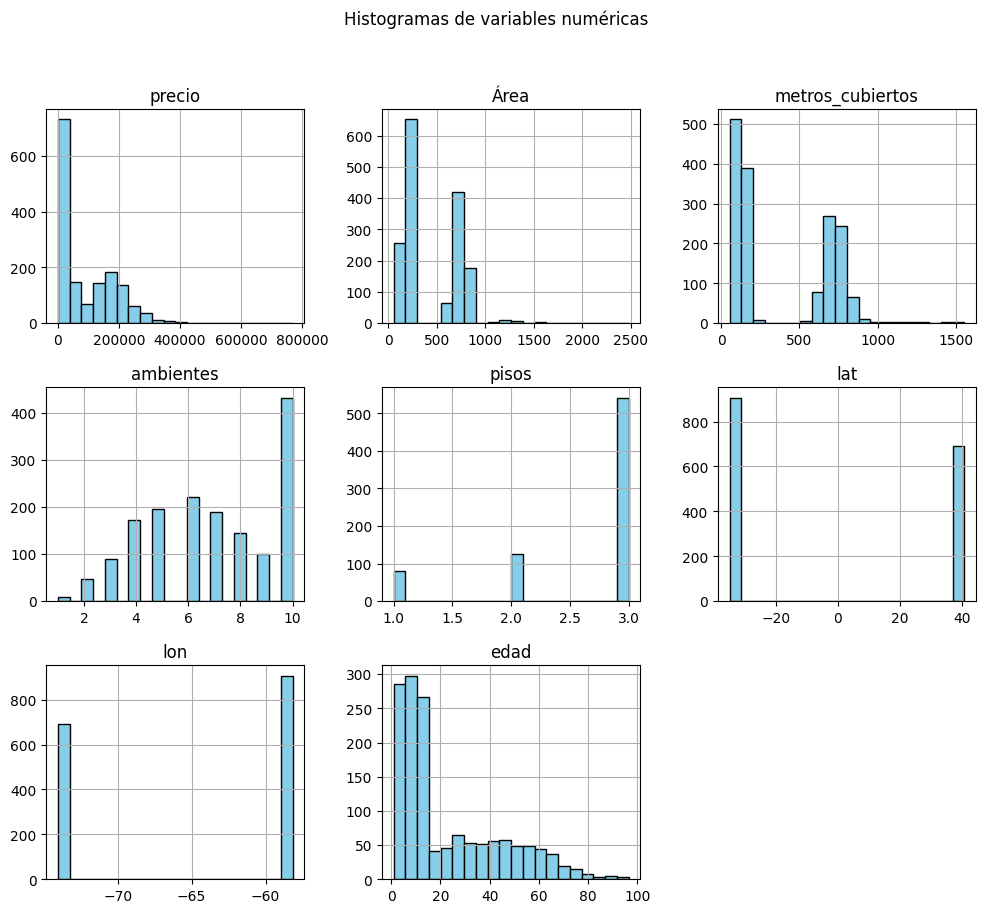

In [3]:
df.hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histogramas de variables numéricas")
plt.show()

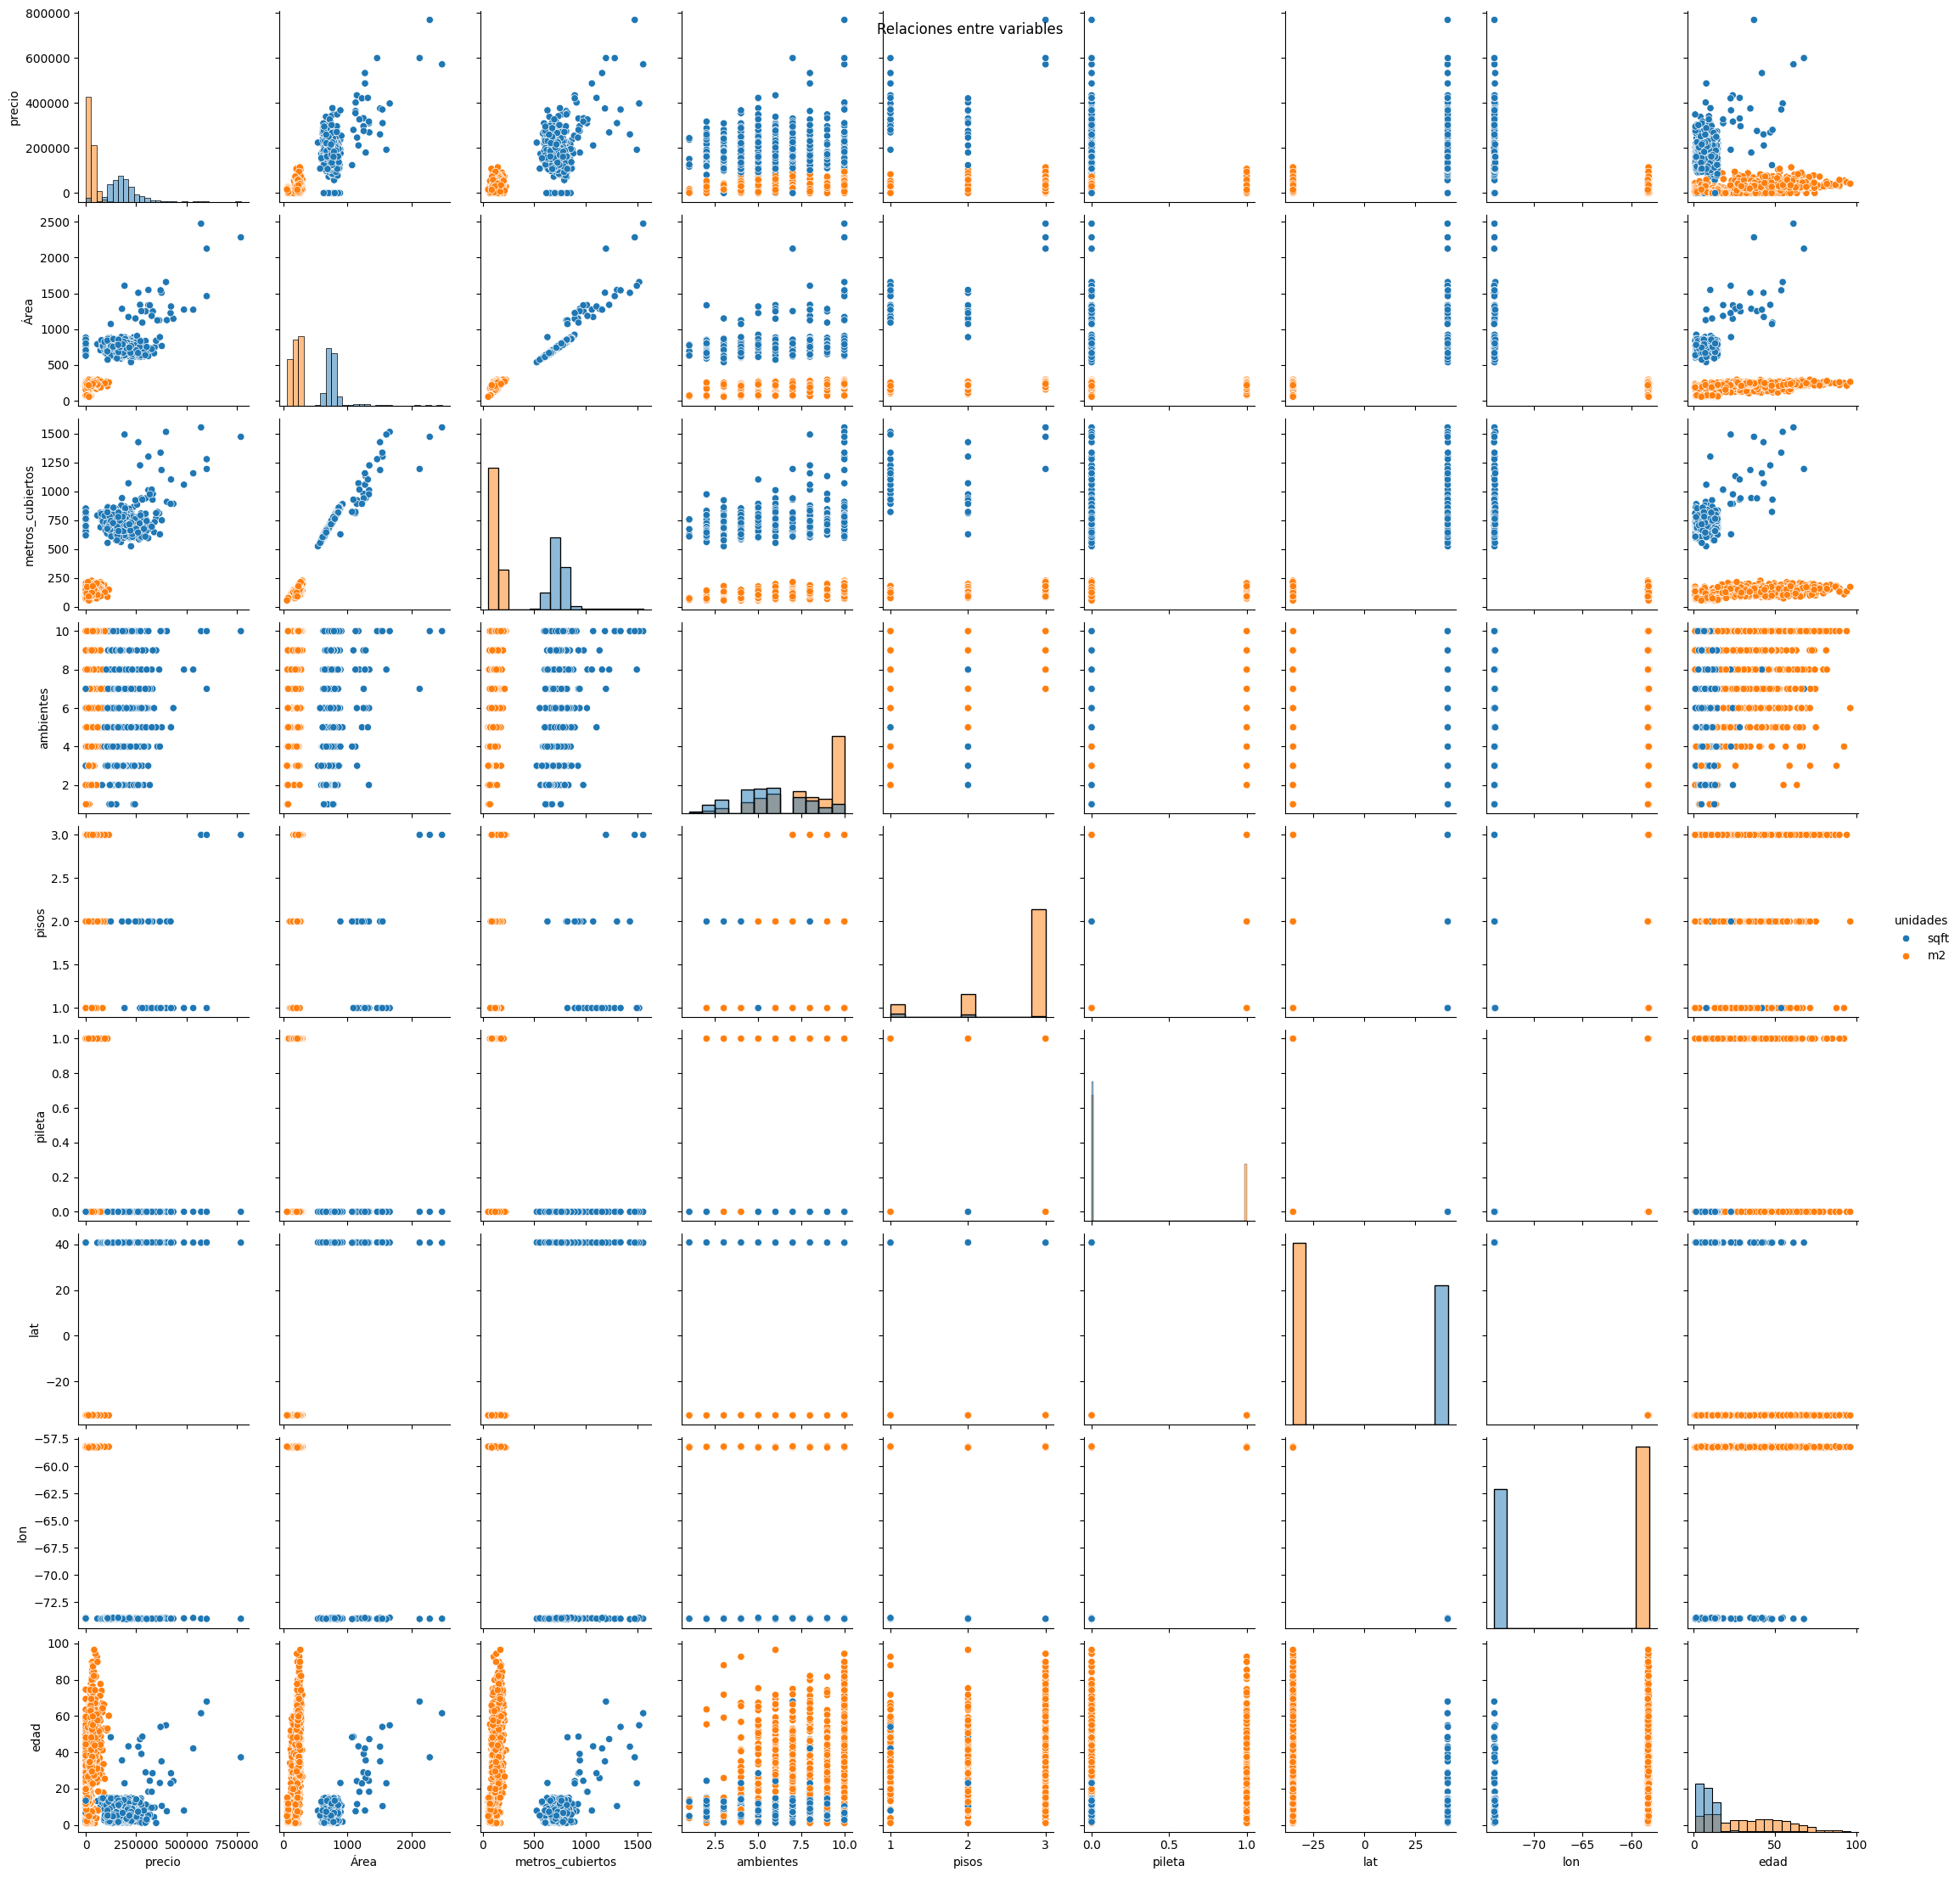

In [4]:
sns.pairplot(df[["precio", "tipo", "Área", "metros_cubiertos", "unidades", "ambientes", "pisos", "pileta", "lat", "lon", "edad"]], hue="unidades", diag_kind="hist")
plt.suptitle("Relaciones entre variables")
plt.show()

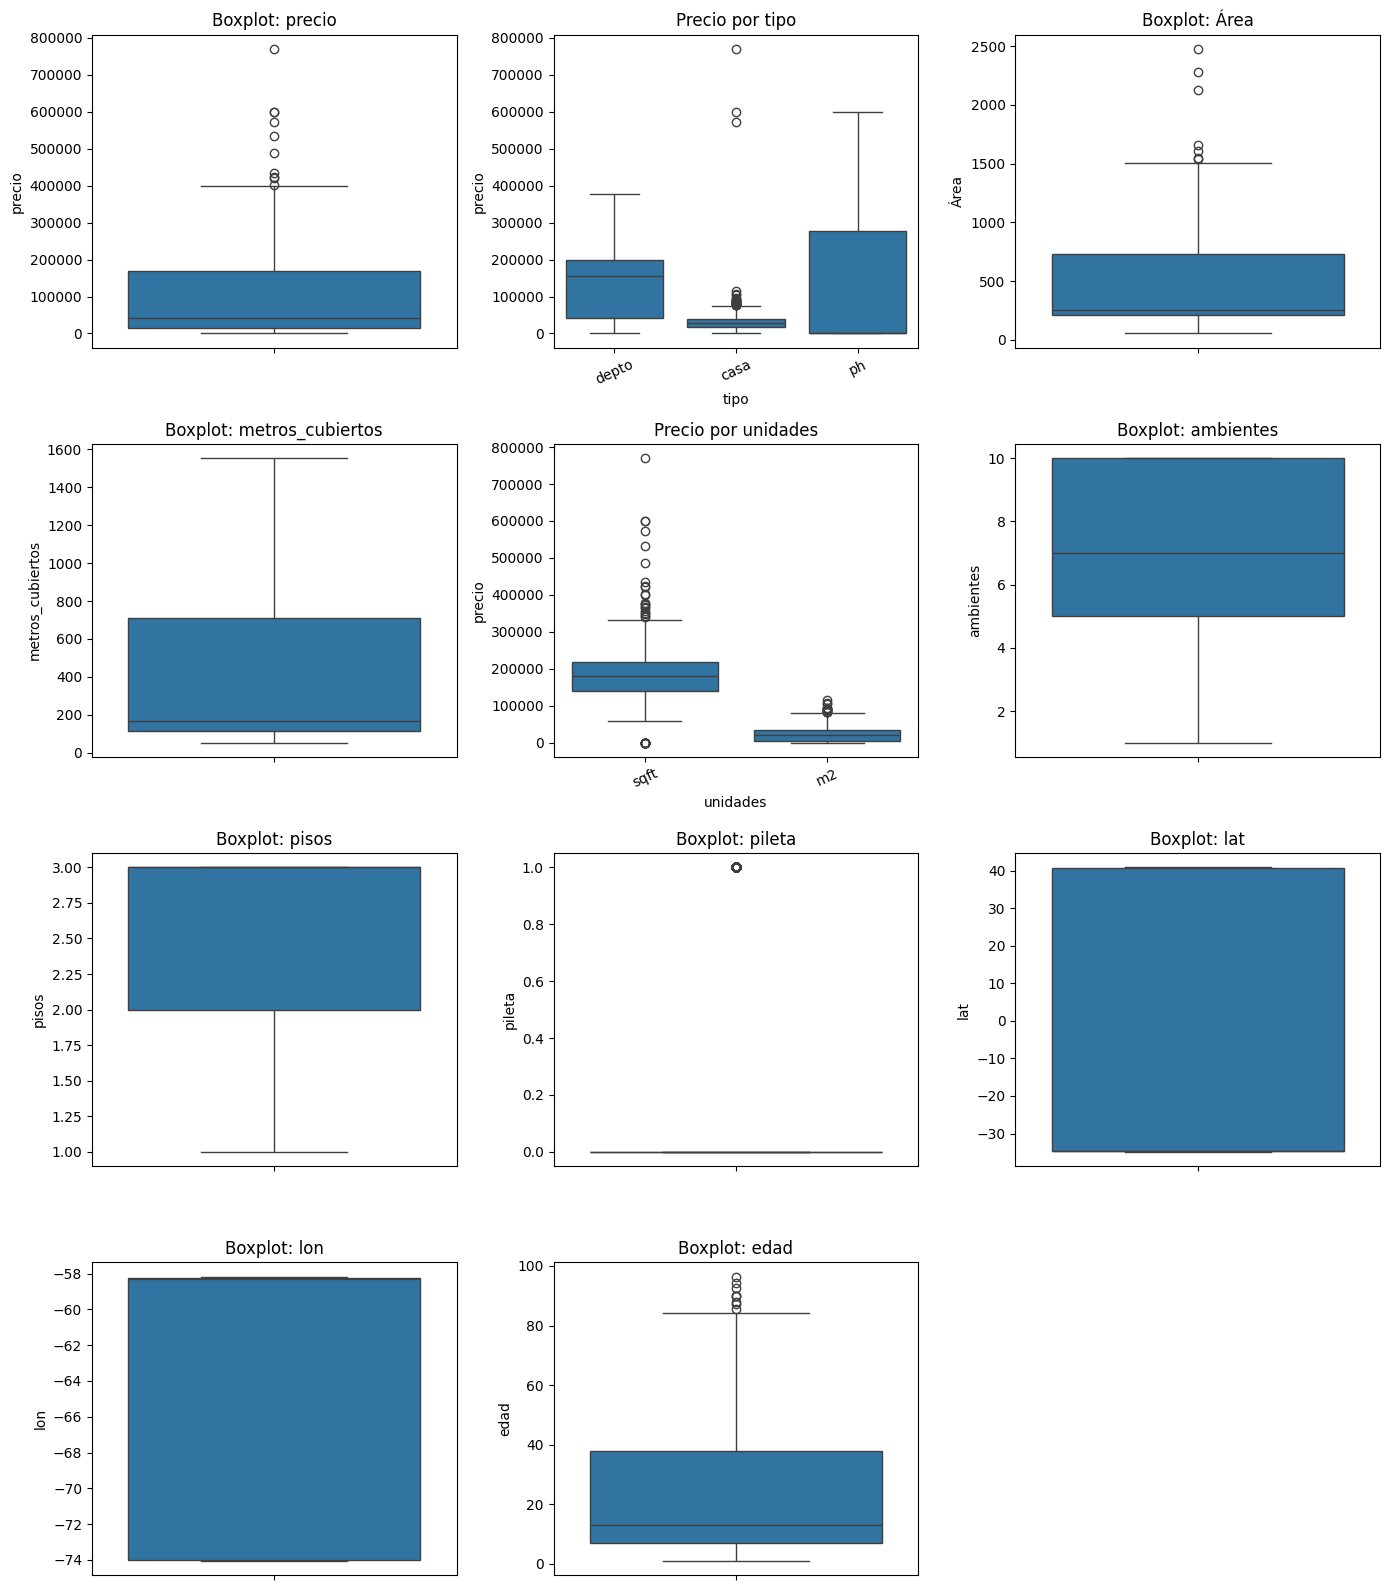

In [5]:

variables = ["precio", "tipo", "Área", "metros_cubiertos", "unidades",
             "ambientes", "pisos", "pileta", "lat", "lon", "edad"]

# --- BOXPLOTS: una grilla que se ajusta al número de variables ---
n_vars = len(variables)
cols = 3
rows = (n_vars + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.ravel()

# Recorro SOLO la cantidad de ejes disponibles
for ax, var in zip(axes, variables):
    if var not in df.columns:
        ax.set_visible(False)
        continue
    # si es numérica -> boxplot univariado
    if pd.api.types.is_numeric_dtype(df[var]):
        sns.boxplot(y=df[var], ax=ax)
        ax.set_title(f"Boxplot: {var}")
    else:
        # si es categórica y existe 'precio', muestro precio por categoría
        if "precio" in df.columns:
            sns.boxplot(x=df[var].astype(str), y=df["precio"], ax=ax)
            ax.set_title(f"Precio por {var}")
            ax.tick_params(axis="x", rotation=25)
        else:
            sns.countplot(x=df[var].astype(str), ax=ax)
            ax.set_title(f"Frecuencias de {var}")
            ax.tick_params(axis="x", rotation=25)

# Si sobran ejes (cuando rows*cols > n_vars), los borro
for j in range(n_vars, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
def normalize (dataset):
    num_cols = dataset.select_dtypes(include=np.number).columns
    min_vals = dataset[num_cols].min()
    max_vals = dataset[num_cols].max()
    dataset[num_cols] = (dataset[num_cols] - min_vals) / (max_vals - min_vals)
    return dataset, min_vals, max_vals

def DeNormalize (y_pred_norm, min_vals, max_vals):
    return y_pred_norm * (max_vals["precio"] - min_vals["precio"]) + min_vals["precio"]

In [ ]:
#Modelo 1
y1 = df["precio"]

xM1 = df [["Área"]]
M1 = RegresionLineal(xM1, y1, bias = True).fit_pinv()

print("Modelo M1(Área vs Precio)")

M1.print_coef() 

Modelo M1(Área vs Precio)
bias  : nan
Área  : nan


Aparecen NaN por la presencia de NaNs en el datset, asi que trasformo los datos para evitar este resultado


In [9]:
xM1 = pd.to_numeric(df["Área"], errors="coerce").fillna(0).to_frame()
y1 = pd.to_numeric(df["precio"], errors="coerce").fillna(0)

M1 = RegresionLineal(xM1, y1, bias = True).fit_pinv()

print("Modelo M1(Área vs Precio)")

M1.print_coef() 

print("MSE:", M1.mse())
print("R² :", M1.score())

Modelo M1(Área vs Precio)
bias  : -24754.84320
Área  : 260.05316
MSE: 2704295651.1354876
R² : 0.7087717495150495


In [ ]:
y2 = pd.to_numeric(df["precio"], errors="coerce").fillna(0).astype(float)

xM2 = df [["Área", "pileta"]].copy() #evito SettingWithCopyWarning con el copy()
xM2["Área"] = pd.to_numeric(xM2["Área"], errors="coerce")
xM2["pileta"] = xM2["pileta"].astype(int)
xM2 = xM2.fillna(0).astype(float)

M2 = RegresionLineal(xM2, y2, bias = True).fit_pinv()

print("Modelo M2(Área y pileta vs Precio)")

M2.print_coef()

print("MSE:", M2.mse())
print("R² :", M2.score())

Modelo M2(Área y pileta vs Precio)
bias    : -23204.20738
Área    : 258.31162
pileta  : -4448.30832
MSE: 2701725976.068628
R² : 0.7090484803428058


In [17]:
caracteristicas = ["Área", "metros_cubiertos", "ambientes", "pisos", "edad", "pileta"]
xM3 = df[caracteristicas].copy()

for i in caracteristicas:
    xM3[i] = pd.to_numeric(xM3[i], errors="coerce").fillna(0).astype(float)
    if xM3[i].dtype == "bool":
        xM3[i] = xM3[i].astype(int)

y = pd.to_numeric(df["precio"], errors="coerce").fillna(0)

M3 = RegresionLineal(xM3, y, bias = True).fit_pinv()

print("Modelo M3(6 caracteristicas vs Precio)")

M3.print_coef()

print("MSE:", M3.mse())
print("R² :", M3.score())

Modelo M3(6 caracteristicas vs Precio)
bias              : -5518.49373
Área              : 367.28459
metros_cubiertos  : -131.80322
ambientes         : -536.42860
pisos             : -10689.21012
edad              : 47.37821
pileta            : 2715.62089
MSE: 2625040031.170291
R² : 0.7173068649466307


In [ ]:
# TENGO QUE HACER FEATURE ENGINEERING A MANO???!!!!!! LPM